ARTHI M, ANGU PRIYADHARSHANYA R, ASHUTOSH DEB, GAYATHRI N 

IMPORTING LIBRARIES AND DEPENDENCIES

In [87]:
%config Completer.use_jedi = False

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 

warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

READING AND UNDERSTANDING DATASET

In [89]:
df = pd.read_csv('ibm_car_details2.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [90]:
df.shape

(8128, 13)

In [91]:
df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [92]:
df.describe

<bound method NDFrame.describe of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission

In [93]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

DATA CLEANING AND DATA PREPROCESSING

In [94]:
df = df.dropna()
df = df.drop_duplicates()

# Removing Unnecessary Columns
df = df[df["owner"] != "Test Drive Car"]

df.reset_index(drop=True, inplace=True)

In [95]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [96]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [97]:
df.shape

(6712, 13)

In [98]:
df.info

<bound method DataFrame.info of                                    name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2              Honda City 2017-2020 EXi  2006         158000     140000   
3             Hyundai i20 Sportz Diesel  2010         225000     127000   
4                Maruti Swift VXI BSIII  2007         130000     120000   
...                                 ...   ...            ...        ...   
6707  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6708         Hyundai i20 Magna 1.4 CRDi  2014         475000      80000   
6709                  Hyundai i20 Magna  2013         320000     110000   
6710              Hyundai Verna CRDi SX  2007         135000     119000   
6711             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mil

In [99]:
print(df["fuel"].value_counts())
print(df["seller_type"].value_counts())
print(df["transmission"].value_counts())
print(df["owner"].value_counts())

Diesel    3657
Petrol    2969
CNG         51
LPG         35
Name: fuel, dtype: int64
Individual          6024
Dealer               661
Trustmark Dealer      27
Name: seller_type, dtype: int64
Manual       6141
Automatic     571
Name: transmission, dtype: int64
First Owner             4176
Second Owner            1888
Third Owner              493
Fourth & Above Owner     155
Name: owner, dtype: int64


In [100]:
df['company']=df['name'].str.split().str.slice(start=0,stop=1).str.join(' ')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [101]:
df.to_csv('cleaned_car_details.csv')

DATA VISUALIZATION


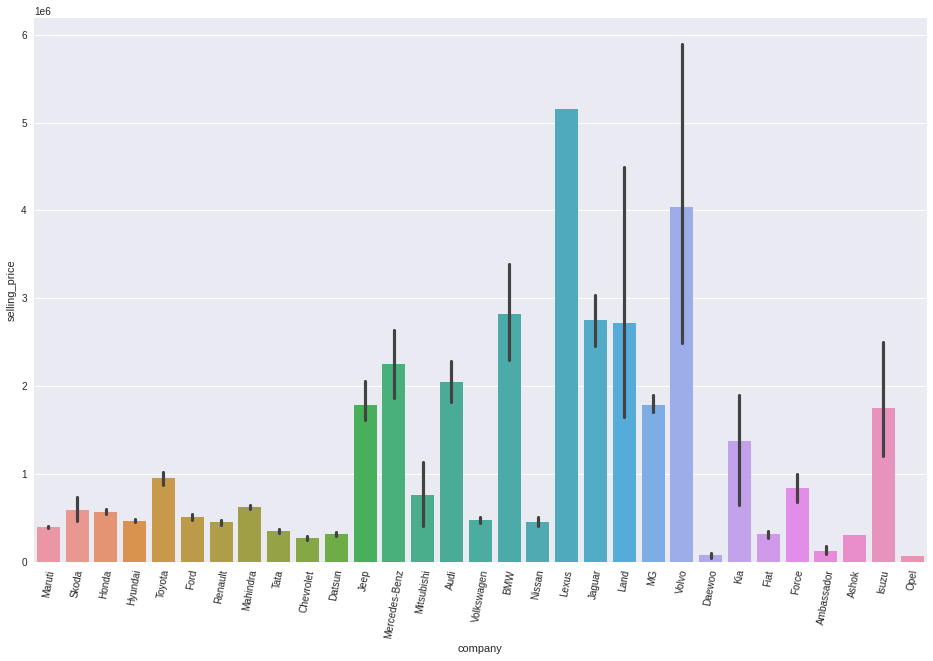

In [102]:
name = df["name"]
names = []

for i in range(len(name)):
    c = str(name[i]).split(" ")[0]
    names.append(c)
    
df["company"] = pd.DataFrame(names)

plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='company', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

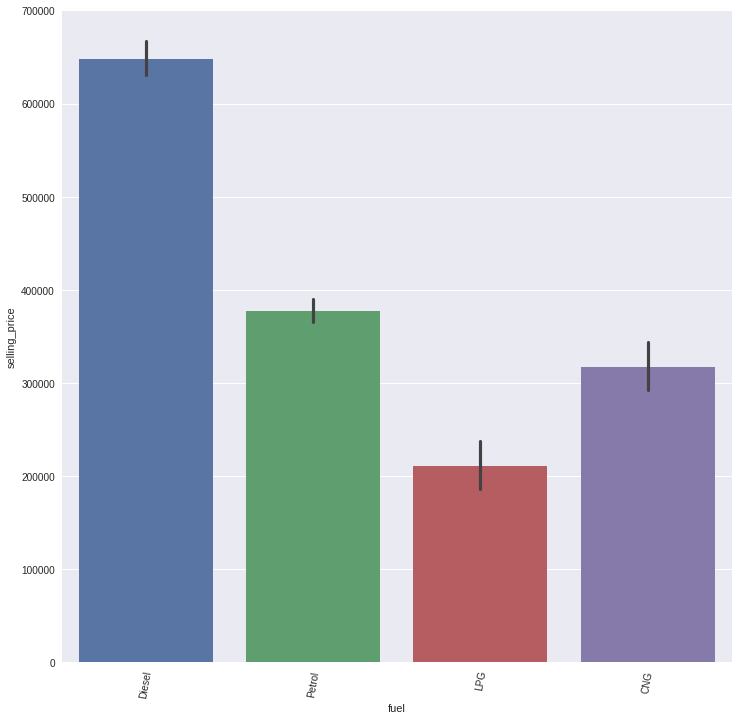

In [103]:
plt.figure(figsize = (12,12))
plot = sns.barplot(y='selling_price', x='fuel', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

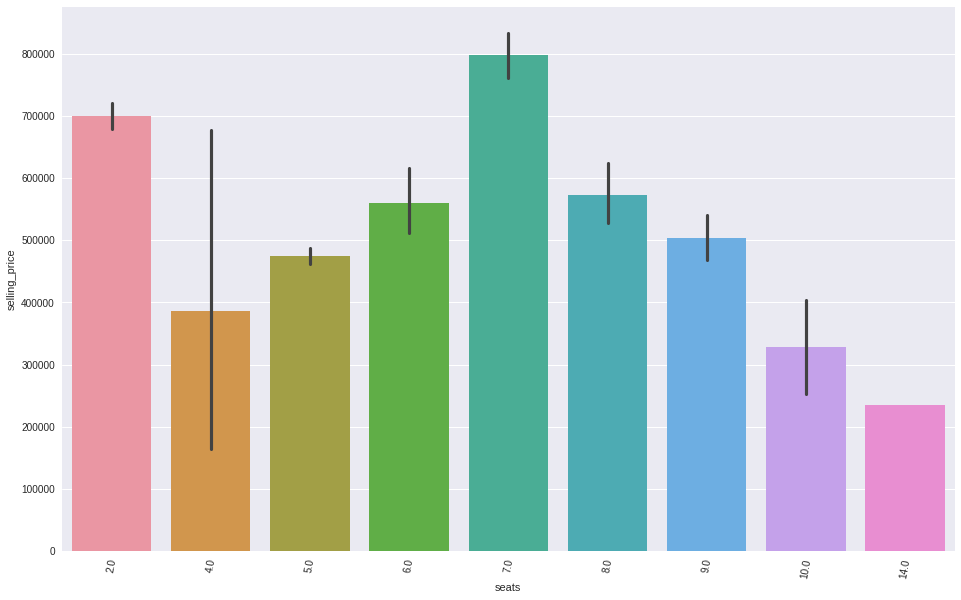

In [104]:
plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='seats', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

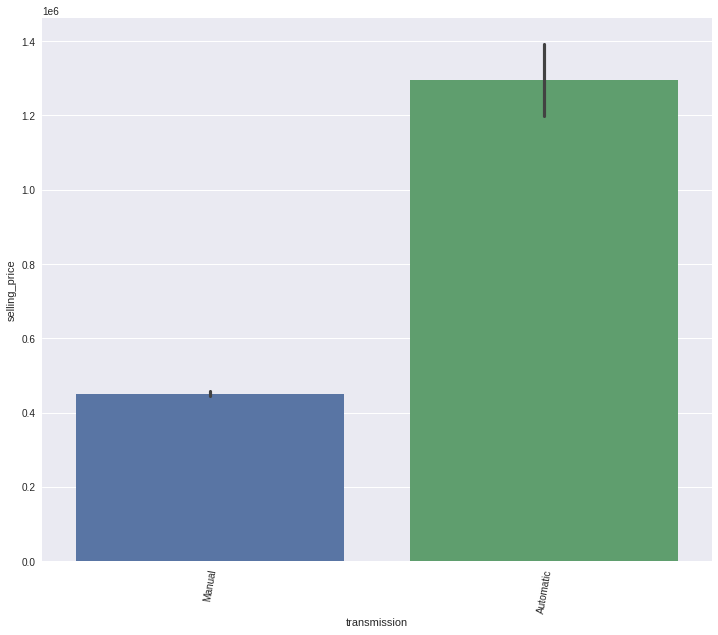

In [105]:
plt.figure(figsize = (12,10))
plot = sns.barplot(y='selling_price', x='transmission', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()


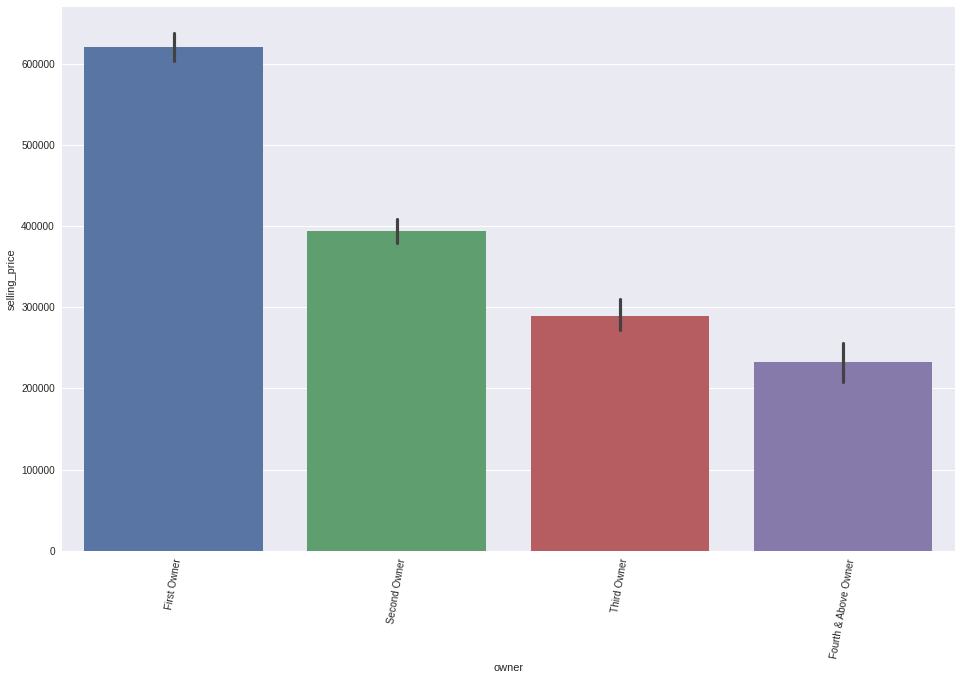

In [106]:
plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='owner', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

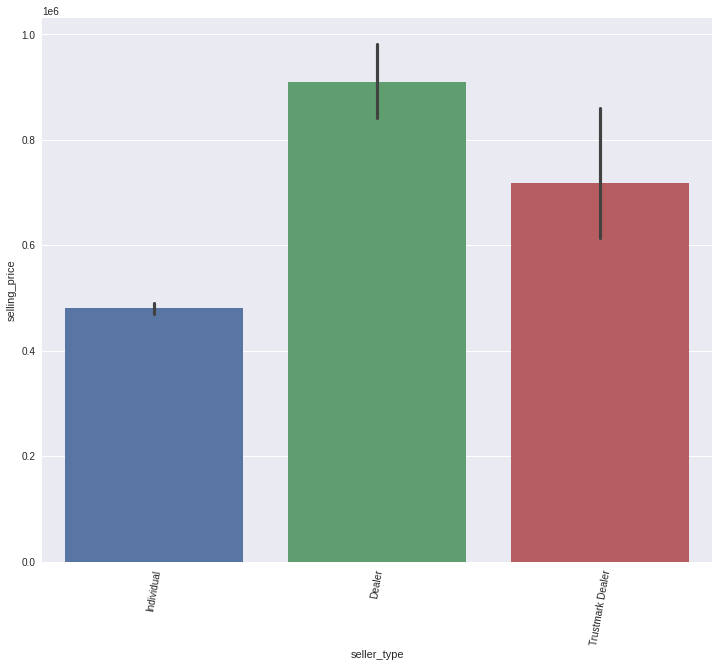

In [107]:
plt.figure(figsize = (12,10))
plot = sns.barplot(y='selling_price', x='seller_type', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()

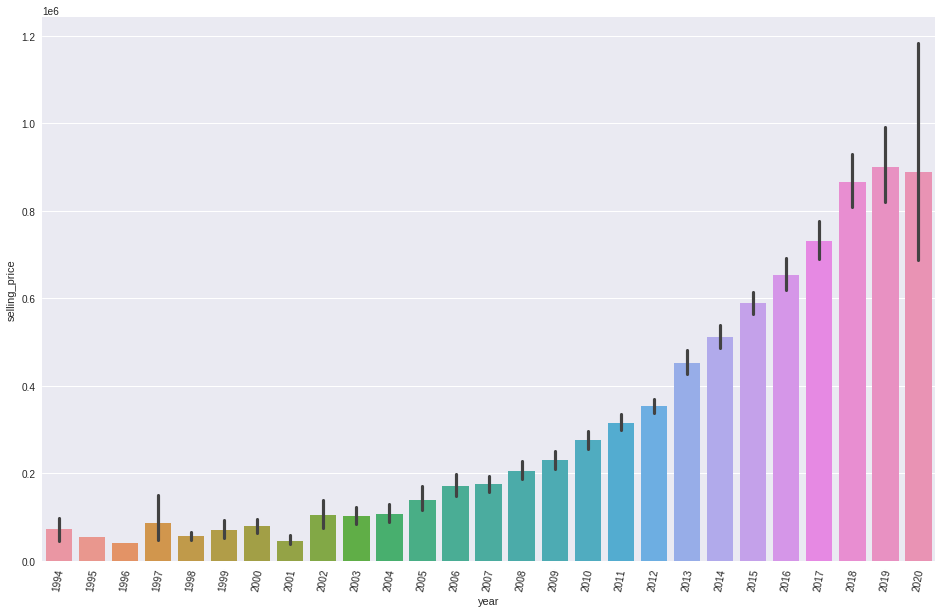

In [108]:
plt.figure(figsize = (16,10))
plot = sns.barplot(y='selling_price', x='year', data=df)
plt.setp(plot.get_xticklabels(), rotation=80)
plt.show()


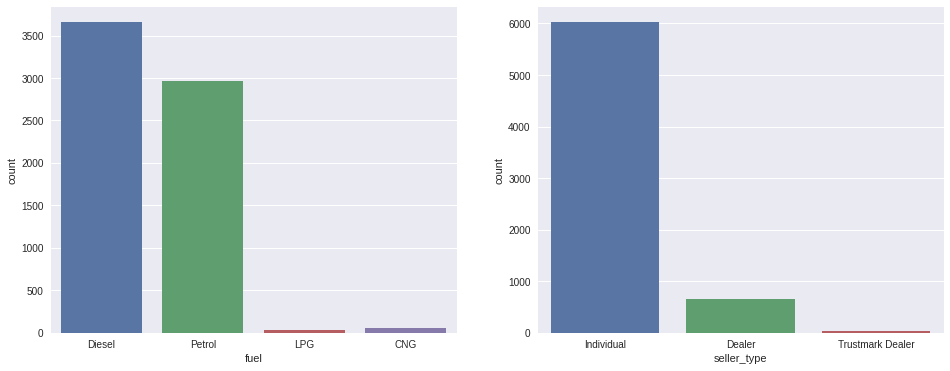

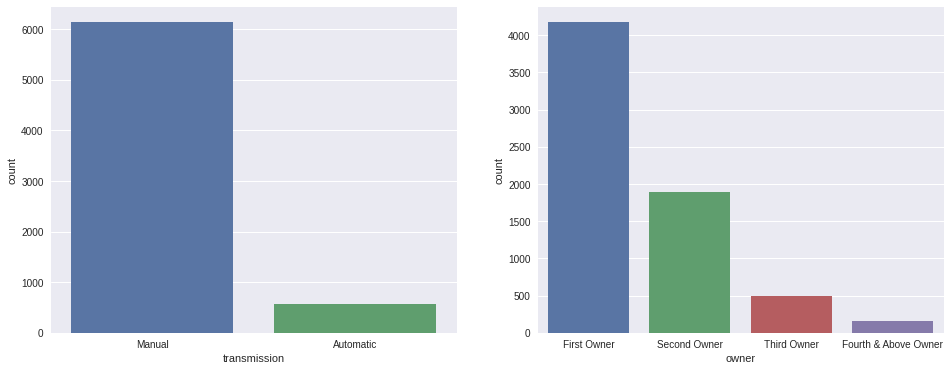

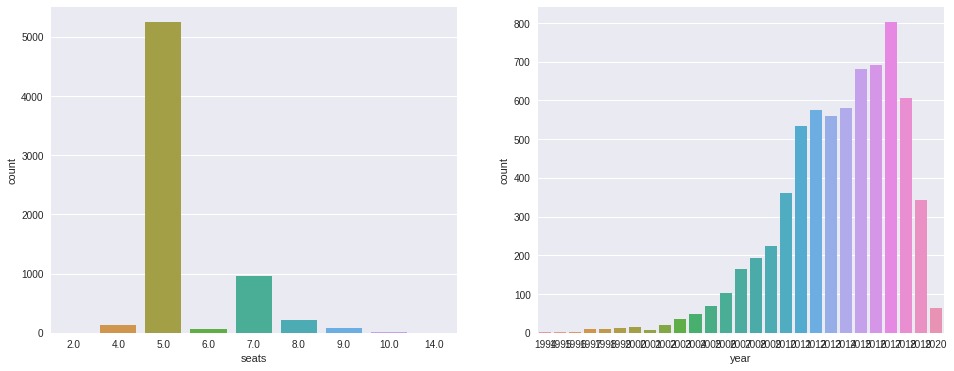

In [109]:
cat_cols = ['fuel','seller_type','transmission','owner', 'seats', 'year']
i=0
while i < len(cat_cols):
    fig = plt.figure(figsize=[16,6])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

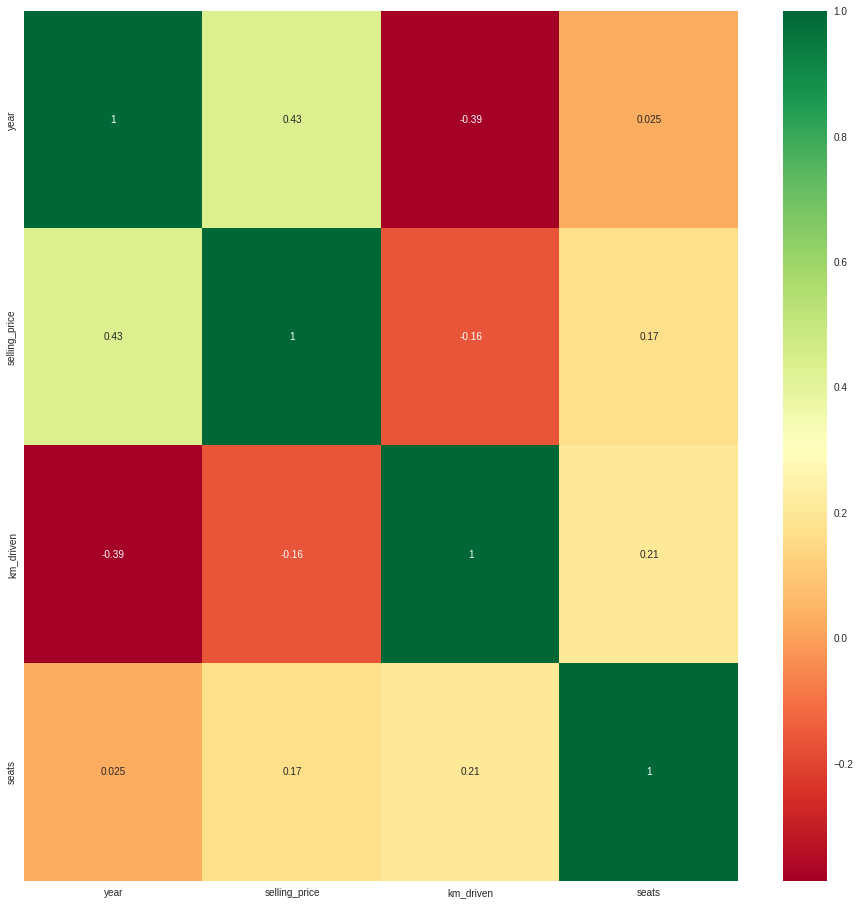

In [110]:
plt.figure(figsize = (16,16))
sns.heatmap(df[df.columns].corr(), annot = True, cmap = "RdYlGn")
plt.show()

DATA SPLITTING

In [111]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


In [112]:
X = df.drop(columns = ["selling_price"])
Y = df["selling_price"]

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 32)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5034, 13)
(1678, 13)
(5034,)
(1678,)


MODEL TRAINING

In [114]:
ohe = OneHotEncoder()
ohe.fit(X[["name", "company", "owner", "transmission", "seller_type", "fuel", "mileage", "engine", "max_power", "torque"]])

columns_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_), ["name", "company", "owner", "transmission", "seller_type", "fuel", "mileage", "engine", "max_power", "torque"]), remainder="passthrough")

In [115]:
Rf = RandomForestRegressor(n_estimators = 10, random_state = 10)

Rf = make_pipeline(columns_trans, Rf)
Rf.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador CLASSIC 1500 DSL AC',
       'Ambassador Classic 2000 DSZ AC PS',
       'Ambassador Grand 1500 DSZ BSIII', ..., 'Volvo XC40 D4 R-Design',
       'Volvo XC60 Inscription D5 BSIV', 'Volvo XC90 T8 Excellence BSIV'],
      dtype=object),
                                                                            array(['Ambassador'...
       '96.1Nm@ 3000rpm', '96Nm@ 2500rpm', '96Nm@ 3000rpm',
       '96Nm@ 3500rpm', '98Nm@ 1600-3000rpm', '99.04Nm@ 4500rpm',
       '99.07Nm@ 4500rpm', '99.1Nm@ 4500rpm', '99.8Nm@ 2700rpm',
       '99Nm@ 4500rpm'], dtype=object)]),
                                                  ['name', 'company', 'owner',
                                                   'transmission',
                           

In [116]:
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)

# R Square
r2_score = metrics.r2_score(Y_train, Rf_train_pred)
print(f"Training: R Square: {r2_score}") 

# Cross Validation
cross_val = cross_val_score(Rf ,X_train ,Y_train ,cv=5)
print(f"Training: Cross Validation: {cross_val}")

# R Square
r2_score = metrics.r2_score(Y_test, Rf_test_pred)
print(f"Testing: R Square: {r2_score}") 

# Cross Validation
cross_val = cross_val_score(Rf ,X_test ,Y_test, cv=5)
print(f"Testing: Cross Validation: {cross_val}")

Training: R Square: 0.9634068241842525
Training: Cross Validation: [0.86180265 0.72335423 0.82680209 0.77154654 0.59247079]
Testing: R Square: 0.8398855004626132
Testing: Cross Validation: [0.5442537  0.73055237 0.75570519 0.8653601  0.71294432]


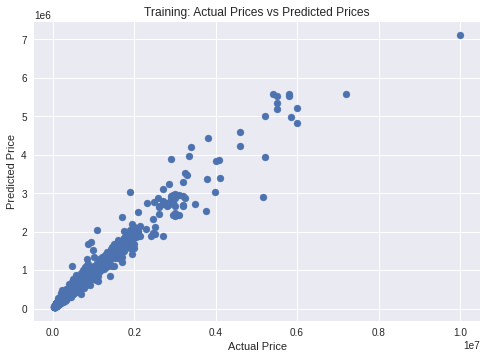

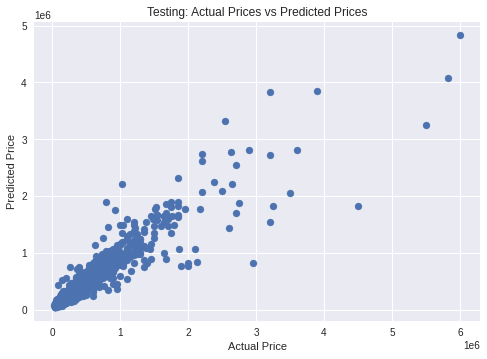

In [117]:
plt.scatter(Y_train, Rf_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training: Actual Prices vs Predicted Prices")
plt.show()

plt.scatter(Y_test, Rf_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Testing: Actual Prices vs Predicted Prices")
plt.show()

PREDICTION

In [118]:
# Saving Model using Pickle
pickle.dump(Rf, open('IBM prediction model.pkl', 'wb'))

# Loading Model using Pickle 
model = pickle.load(open('IBM prediction model.pkl', 'rb'))

In [122]:
company = "Maruti"
name = "Maruti Swift Dzire VDI"
year = 2020
km_driven = 60000
fuel = "Diesel"
seller_type = "Individual"
transmission = "Automatic"
owner = "First Owner"
mileage = "23.4 kmpl"
engine = "1248 CC"
max_power = "103.52 bhp"
torque = "190Nm@ 2000rpm"
seats = 5

pred_value = model.predict(
    pd.DataFrame(
        [[name, year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats, company ]], 
        columns=["name", "year", "km_driven", "fuel", "seller_type", "transmission", "owner", "mileage", "engine", "max_power", "torque", "seats", "company"]))

print(f"Rs. {np.round(pred_value[0], 2)}")

Rs. 1012700.0


In [120]:
#Save the model

filename = "CarValueResalePredictor.sav"
pickle.dump(Rf, open(filename, 'wb'))
